# Feature Scaling using Standardization

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the dataset
dataset = sns.load_dataset('titanic')
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# here we will use four features to demonstrate the use of Standardization
datasettoworkon = dataset[['survived', 'pclass', 'age', 'parch']]
datasettoworkon.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [4]:
# As the data is not clean, we will fill the missing value with the mean of the column
datasettoworkon_new = datasettoworkon.fillna(datasettoworkon.mean())
datasettoworkon_new.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [5]:
X = datasettoworkon_new.drop('survived', axis=1)
y = datasettoworkon_new['survived']
X.shape, y.shape

((891, 3), (891,))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [7]:
StandardScaler_object = StandardScaler()
StandardScaler_object.fit_transform(X_train)
StandardScaler_object.mean_

array([ 2.31741573, 29.73606122,  0.39185393])

In [8]:
StandardScaler_object.scale_

array([ 0.8331813 , 13.08027558,  0.82079089])

In [9]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.317416,29.736061,0.391854
std,0.833767,13.089471,0.821368
min,1.000000,0.670000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,80.000000,6.000000


In [10]:
X_train_transformed = StandardScaler_object.transform(X_train)
X_test_transformed = StandardScaler_object.transform(X_test)

In [11]:
X_train_transformed

array([[ 0.81925059, -0.00282437,  1.95926403],
       [-0.38096838,  0.09662937, -0.47741019],
       [-0.38096838,  0.09662937,  0.74092692],
       ...,
       [ 0.81925059, -0.00282437, -0.47741019],
       [ 0.81925059,  0.47888431, -0.47741019],
       [-0.38096838,  2.31370804,  0.74092692]])

In [13]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=['pclass', 'age', 'parch'])
X_test_transformed = pd.DataFrame(X_test_transformed, columns=['pclass', 'age', 'parch'])

In [16]:
X_train_transformed.head()

,pclass,age,parch
0,0.819251,-0.002824,1.959264
1,-0.380968,0.096629,-0.477410
2,-0.380968,0.096629,0.740927
3,0.819251,-0.744332,-0.477410
4,0.819251,-0.667881,-0.477410


In [17]:
X_test_transformed.head()

,pclass,age,parch
0,0.819251,-0.002824,-0.477410
1,0.819251,-0.002824,-0.477410
2,0.819251,-1.738194,0.740927
3,-1.581187,-0.002824,-0.477410
4,0.819251,-0.056273,1.959264


In [19]:
X_train_transformed.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.58,-2.22,-0.48
25%,-0.38,-0.59,-0.48
50%,0.82,-0.00,-0.48
75%,0.82,0.40,-0.48
max,0.82,3.84,6.83


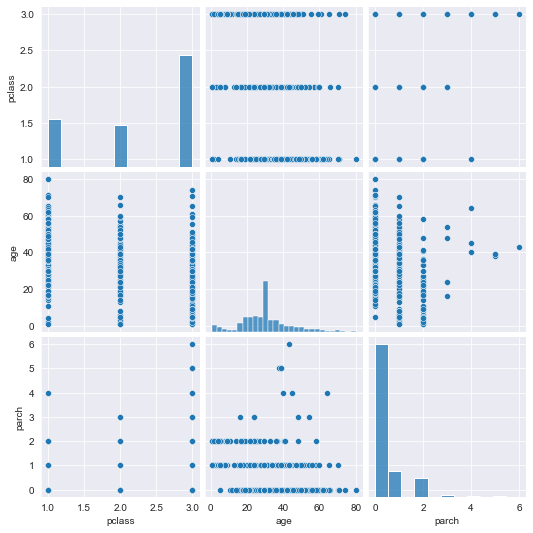

In [20]:
sns.pairplot(X_train)

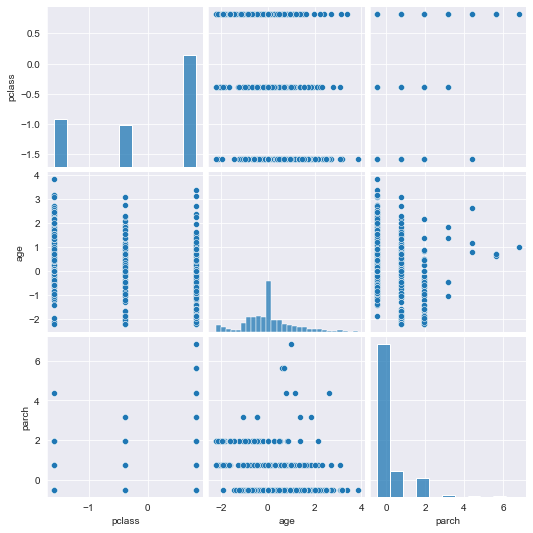

In [21]:
sns.pairplot(X_train_transformed)

### Prepared by RITURAJ RAMAN